# High-level introduction to <code>pandas</code>
For a more complete introduction to <code>pandas</code>, see [https://pandas.pydata.org/](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
s = {'a1': 'gino', 'a2': 'mario'}

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [2]:
data = np.random.randn(20)
index = range(1990, 2010)

In [3]:
print (data)
print (list(index))

[-0.16493848  0.64337628 -0.66503497 -0.20091948  0.16603028 -0.624519
 -0.65906297 -0.30310653  0.12116521  0.00299463  1.63370778  0.7856198
  1.24933059 -0.55087697  0.40873503  0.73009808  0.16168177  0.71547607
  0.14130865  1.34938204]
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [4]:
y = pd.Series(data, index=index)

In [5]:
print (y)

1990   -0.164938
1991    0.643376
1992   -0.665035
1993   -0.200919
1994    0.166030
1995   -0.624519
1996   -0.659063
1997   -0.303107
1998    0.121165
1999    0.002995
2000    1.633708
2001    0.785620
2002    1.249331
2003   -0.550877
2004    0.408735
2005    0.730098
2006    0.161682
2007    0.715476
2008    0.141309
2009    1.349382
dtype: float64


In [8]:
y.loc[1992]

-0.6650349714057472

In [10]:
salaries = {
    'gino': 1500, 'maria': 2560.34, 'luca': None, 'federico': 2451
}

In [11]:
s = pd.Series(salaries)

In [12]:
print (s)

gino        1500.00
maria       2560.34
luca            NaN
federico    2451.00
dtype: float64


### Access series as arrays

In [13]:
print (s[:2], '\n')
print (s[s > s.median()], '\n')
print (np.log(s), '\n')
print (s + s, '\n')
print (s * 3, '\n')

gino     1500.00
maria    2560.34
dtype: float64 

maria    2560.34
dtype: float64 

gino        7.313220
maria       7.847895
luca             NaN
federico    7.804251
dtype: float64 

gino        3000.00
maria       5120.68
luca            NaN
federico    4902.00
dtype: float64 

gino        4500.00
maria       7681.02
luca            NaN
federico    7353.00
dtype: float64 



In [14]:
print (y[4:8] + y[4:10])

1994    0.332061
1995   -1.249038
1996   -1.318126
1997   -0.606213
1998         NaN
1999         NaN
dtype: float64


### Access series as dictionaries

In [15]:
y[1990]

-0.16493848229378008

# Data Frames
From [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [16]:
k = {'years': y, 'salaries': s}
df = pd.DataFrame(k)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


In [17]:
print (df)

             years  salaries
1990     -0.164938       NaN
1991      0.643376       NaN
1992     -0.665035       NaN
1993     -0.200919       NaN
1994      0.166030       NaN
1995     -0.624519       NaN
1996     -0.659063       NaN
1997     -0.303107       NaN
1998      0.121165       NaN
1999      0.002995       NaN
2000      1.633708       NaN
2001      0.785620       NaN
2002      1.249331       NaN
2003     -0.550877       NaN
2004      0.408735       NaN
2005      0.730098       NaN
2006      0.161682       NaN
2007      0.715476       NaN
2008      0.141309       NaN
2009      1.349382       NaN
gino           NaN   1500.00
maria          NaN   2560.34
luca           NaN       NaN
federico       NaN   2451.00


In [18]:
data = {}
for k, v in s.items():
    data[k] = {}
    for d, w in y.items():
        data[k][d] = v + (v*w)

In [20]:
ydf = pd.DataFrame(data)

In [21]:
print (ydf)

             gino        maria  luca     federico
1990  1252.592277  2138.041406   NaN  2046.735780
1991  2465.064413  4207.602013   NaN  4027.915251
1992   502.447543   857.624361   NaN   820.999285
1993  1198.620785  2045.917827   NaN  1958.546363
1994  1749.045417  2985.433962   NaN  2857.940211
1995   563.221504   961.359031   NaN   920.303938
1996   511.405552   872.914728   NaN   835.636673
1997  1045.340200  1784.284219   NaN  1708.085887
1998  1681.747820  2870.564142   NaN  2747.975938
1999  1504.491952  2568.007283   NaN  2458.339850
2000  3950.561663  6743.187365   NaN  6455.217757
2001  2678.429695  4571.793791   NaN  4376.554122
2002  3373.995892  5759.051095   NaN  5513.109288
2003   673.684552  1149.907671   NaN  1100.800558
2004  2113.102541  3606.840639   NaN  3452.809552
2005  2595.147127  4429.639331   NaN  4240.470406
2006  1742.522655  2974.300302   NaN  2847.282018
2007  2573.214100  4392.201993   NaN  4204.631840
2008  1711.962980  2922.138198   NaN  2797.347510


In [22]:
ydf.head(n=2)

gino        maria  luca     federico
1990  1252.592277  2138.041406   NaN  2046.735780
1991  2465.064413  4207.602013   NaN  4027.915251

In [23]:
ydf.shape

(20, 4)

In [26]:
pd.DataFrame.from_dict(data, orient='index').head()

1990         1991        1992         1993         1994  \
federico  2046.735780  4027.915251  820.999285  1958.546363  2857.940211   
gino      1252.592277  2465.064413  502.447543  1198.620785  1749.045417   
luca              NaN          NaN         NaN          NaN          NaN   
maria     2138.041406  4207.602013  857.624361  2045.917827  2985.433962   

                1995        1996         1997         1998         1999  \
federico  920.303938  835.636673  1708.085887  2747.975938  2458.339850   
gino      563.221504  511.405552  1045.340200  1681.747820  1504.491952   
luca             NaN         NaN          NaN          NaN          NaN   
maria     961.359031  872.914728  1784.284219  2870.564142  2568.007283   

                 2000         2001         2002         2003         2004  \
federico  6455.217757  4376.554122  5513.109288  1100.800558  3452.809552   
gino      3950.561663  2678.429695  3373.995892   673.684552  2113.102541   
luca              NaN          NaN          NaN          NaN          NaN   
maria     6743.187365  4571.793791  5759.051095  1149.907671  3606.840639   

                 2005         2006         2007         2008         2009  
federico  4240.470406  2847.282018  4204.631840  2797.347510  5758.335372  
gino      2595.147127  1742.522655  2573.214100  1711.962980  3524.073055  
luca              NaN          NaN          NaN          NaN          NaN  
maria     4429.639331  2974.300302  4392.201993  2922.138198  6015.216804

## Loading and manipulating data
Retrieve the complete local dataset from <a href="https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales">Kaggle website</a>.

In [27]:
accidents = '/Users/alfio/Teaching/2018-19/generali/torino/pygen/data/trafficsample.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)

In [28]:
A.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
175309  201243N075042                 497930                  188010   
53367        2.01E+12                 621820                  309050   
85873   201305DD03109                 352450                  397563   
359233  201243N210022                 479520                  194780   
340672  201401GD11000                 535170                  185350   

        Longitude   Latitude  Police_Force  Accident_Severity  \
175309  -0.588005  51.582399            43                  3   
53367    1.276633  52.633805            36                  3   
85873   -2.717854  53.472632             5                  2   
359233  -0.852115  51.646155            43                  3   
340672  -0.051837  51.550802             1                  3   

        Number_of_Vehicles  Number_of_Casualties        Date  ...   \
175309                   2                     1  04/04/2012  ...    
53367                    2                     1  23/12/2013  ...    
85873                    5                     3  14/06/2013  ...    
359233                   1                     1  21/02/2012  ...    
340672                   2                     1  09/12/2014  ...    

            Pedestrian_Crossing-Physical_Facilities  \
175309        No physical crossing within 50 meters   
53367         No physical crossing within 50 meters   
85873         No physical crossing within 50 meters   
359233        No physical crossing within 50 meters   
340672  Pedestrian phase at traffic signal junction   

                               Light_Conditions       Weather_Conditions  \
175309  Darkness: Street lights present and lit  Fine without high winds   
53367            Daylight: Street light present  Fine without high winds   
85873            Daylight: Street light present  Raining with high winds   
359233           Daylight: Street light present  Fine without high winds   
340672           Daylight: Street light present  Fine without high winds   

       Road_Surface_Conditions  Special_Conditions_at_Site  \
175309                     Dry                        None   
53367                 Wet/Damp                        None   
85873                 Wet/Damp                        None   
359233                     Dry                        None   
340672                     Dry                        None   

                            Carriageway_Hazards Urban_or_Rural_Area  \
175309                                     None                   2   
53367                                      None                   1   
85873                                      None                   1   
359233                                     None                   2   
340672  Pedestrian in carriageway (not injured)                   1   

        Did_Police_Officer_Attend_Scene_of_Accident  \
175309                                          Yes   
53367                                           Yes   
85873                                           Yes   
359233                                          Yes   
340672                                          Yes   

        LSOA_of_Accident_Location  Year  
175309                  E01017821  2012  
53367                   E01026840  2013  
85873                   E01006852  2013  
359233                  E01017916  2012  
340672                  E01001734  2014  

[5 rows x 33 columns]

In [29]:
A.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [36]:
A[['Date', 'Time']].head()

Date   Time
175309  04/04/2012  20:49
53367   23/12/2013  12:40
85873   14/06/2013  16:48
359233  21/02/2012  07:39
340672  09/12/2014  14:30

In [37]:
from datetime import datetime

def todate(d, t):
    try:
        dt = datetime.strptime(" ".join([d, t]), '%d/%m/%Y %H:%M')
    except TypeError:
        dt = np.nan
    return dt

In [38]:
A['Datetime'] = [todate(x.Date, x.Time) for i, x in A.iterrows()]

In [39]:
A.shape

(10000, 34)

In [40]:
A.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

## Access dataframe by index and col

In [41]:
A.iloc[2:6] # gets rows (or columns) at particular positions in the index (so it only takes integers).

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
85873   201305DD03109                 352450                  397563   
359233  201243N210022                 479520                  194780   
340672  201401GD11000                 535170                  185350   
369203  201342I202807                 550055                  223249   

        Longitude   Latitude  Police_Force  Accident_Severity  \
85873   -2.717854  53.472632             5                  2   
359233  -0.852115  51.646155            43                  3   
340672  -0.051837  51.550802             1                  3   
369203   0.179006  51.887560            42                  3   

        Number_of_Vehicles  Number_of_Casualties        Date  \
85873                    5                     3  14/06/2013   
359233                   1                     1  21/02/2012   
340672                   2                     1  09/12/2014   
369203                   3                     2  15/07/2013   

               ...                        Light_Conditions  \
85873          ...          Daylight: Street light present   
359233         ...          Daylight: Street light present   
340672         ...          Daylight: Street light present   
369203         ...          Daylight: Street light present   

             Weather_Conditions  Road_Surface_Conditions  \
85873   Raining with high winds                 Wet/Damp   
359233  Fine without high winds                      Dry   
340672  Fine without high winds                      Dry   
369203  Fine without high winds                      Dry   

       Special_Conditions_at_Site                      Carriageway_Hazards  \
85873                        None                                     None   
359233                       None                                     None   
340672                       None  Pedestrian in carriageway (not injured)   
369203                       None                                     None   

        Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  \
85873                     1                                         Yes   
359233                    2                                         Yes   
340672                    1                                         Yes   
369203                    2                                         Yes   

        LSOA_of_Accident_Location  Year            Datetime  
85873                   E01006852  2013 2013-06-14 16:48:00  
359233                  E01017916  2012 2012-02-21 07:39:00  
340672                  E01001734  2014 2014-12-09 14:30:00  
369203                  E01022087  2013 2013-07-15 11:20:00  

[4 rows x 34 columns]

In [42]:
A.loc[[85873, 340672]] # gets rows (or columns) with particular labels from the index

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
85873   201305DD03109                 352450                  397563   
340672  201401GD11000                 535170                  185350   

        Longitude   Latitude  Police_Force  Accident_Severity  \
85873   -2.717854  53.472632             5                  2   
340672  -0.051837  51.550802             1                  3   

        Number_of_Vehicles  Number_of_Casualties        Date  \
85873                    5                     3  14/06/2013   
340672                   2                     1  09/12/2014   

               ...                        Light_Conditions  \
85873          ...          Daylight: Street light present   
340672         ...          Daylight: Street light present   

             Weather_Conditions  Road_Surface_Conditions  \
85873   Raining with high winds                 Wet/Damp   
340672  Fine without high winds                      Dry   

       Special_Conditions_at_Site                      Carriageway_Hazards  \
85873                        None                                     None   
340672                       None  Pedestrian in carriageway (not injured)   

        Urban_or_Rural_Area Did_Police_Officer_Attend_Scene_of_Accident  \
85873                     1                                         Yes   
340672                    1                                         Yes   

        LSOA_of_Accident_Location  Year            Datetime  
85873                   E01006852  2013 2013-06-14 16:48:00  
340672                  E01001734  2014 2014-12-09 14:30:00  

[2 rows x 34 columns]

In [43]:
selection = A[A['Road_Surface_Conditions'] == 'Dry'].sort_values(
    'Number_of_Casualties', ascending=False)

In [45]:
selection[['Road_Surface_Conditions', 'Number_of_Casualties']].head()

Road_Surface_Conditions  Number_of_Casualties
342377                     Dry                    21
21228                      Dry                    10
47734                      Dry                    10
387706                     Dry                     9
301798                     Dry                     9

In [46]:
selection[['Weather_Conditions', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].head()

Weather_Conditions  Accident_Severity  Number_of_Vehicles  \
342377  Fine without high winds                  3                   2   
21228   Fine without high winds                  3                   2   
47734   Fine without high winds                  2                   1   
387706  Fine without high winds                  3                   5   
301798                  Unknown                  3                   2   

        Number_of_Casualties  
342377                    21  
21228                     10  
47734                     10  
387706                     9  
301798                     9

In [47]:
selection.shape

(6821, 34)

In [48]:
selection[['Weather_Conditions', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties']].groupby(
    'Weather_Conditions').mean()

Accident_Severity  Number_of_Vehicles  \
Weather_Conditions                                                  
Fine with high winds                 2.780000            1.720000   
Fine without high winds              2.832725            1.844444   
Fog or mist                          2.818182            1.636364   
Other                                2.800000            1.900000   
Raining with high winds              2.500000            2.000000   
Raining without high winds           2.700000            1.900000   
Unknown                              2.883562            1.787671   

                            Number_of_Casualties  
Weather_Conditions                                
Fine with high winds                    1.300000  
Fine without high winds                 1.328767  
Fog or mist                             1.090909  
Other                                   1.233333  
Raining with high winds                 1.000000  
Raining without high winds              1.200000  
Unknown                                 1.267123

In [49]:
sel = selection[['Weather_Conditions', 'Accident_Severity', 
           'Number_of_Vehicles', 'Number_of_Casualties', 'Datetime']]

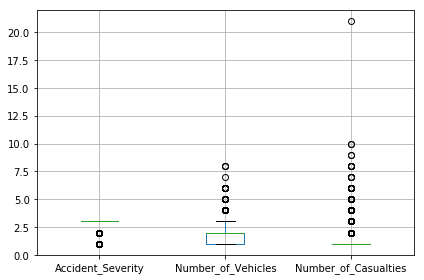

In [51]:
sel.boxplot()
plt.tight_layout()
plt.show()

In [52]:
minutes = []
for i, row in sel.iterrows():
    h, m = row['Datetime'].hour, row['Datetime'].minute
    minutes.append(h*60 + m)
sel = sel.copy()
sel['Minutes'] = minutes

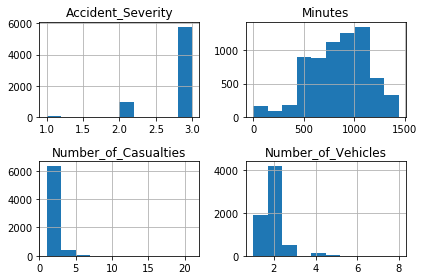

In [53]:
sel.hist()
plt.tight_layout()
plt.show()

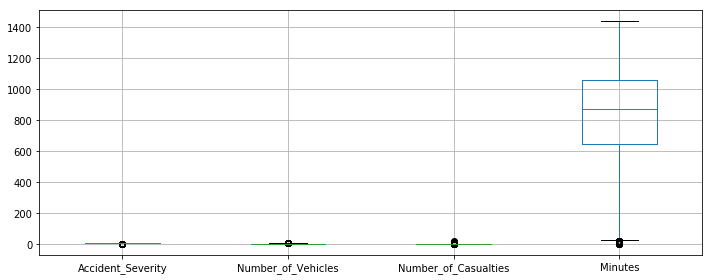

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), sharey=True)
sel.boxplot(ax=axes)
plt.tight_layout()
plt.show()

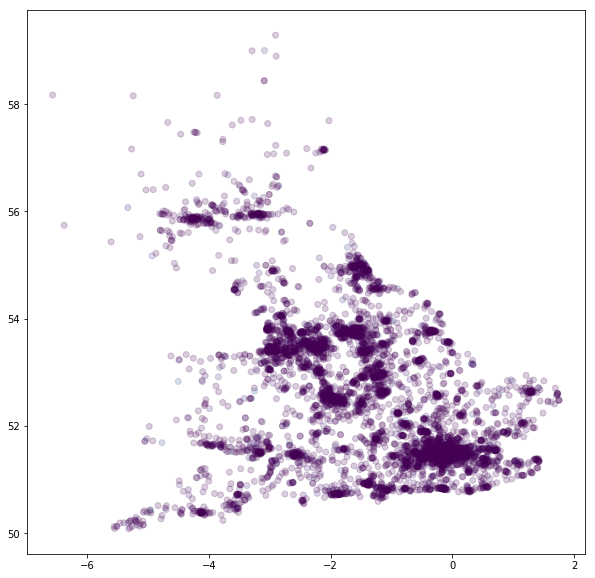

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
axes.scatter(selection.Longitude.values, selection.Latitude.values, 
             c=selection.Number_of_Casualties, alpha=0.2)
plt.show()

In [56]:
import geopandas as gpd

In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [58]:
UK = world[world['iso_a3']=='GBR']

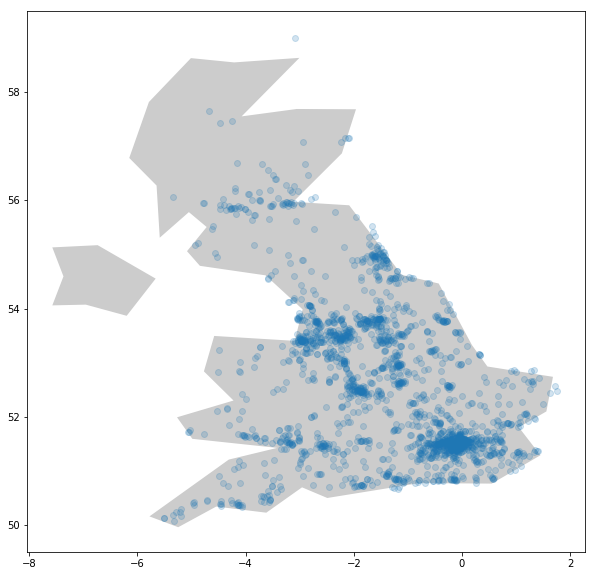

In [59]:
limit = 2000
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharey=True)
UK.plot(ax=axes, color='#CCCCCC')
axes.scatter(selection.Longitude.values[:limit], selection.Latitude.values[:limit], alpha=0.2)
plt.show()

# Example 1: k-means
Implement k-means using <code>NumPy</code> and functions